In [1]:
%matplotlib inline
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy.stats import describe
from numpy.linalg import norm
from enum import Enum

In [100]:
colors = {
    'yellow': np.array([1., 0.9310, 0.]),
    'blue': np.array([0.0018, 0.0037, 0.5288]),
    'cyan': np.array([0., 1., 1.]),
    'pink': np.array([0.969, 0.0001, 1.]),
    'red': np.array([1., 0., 0.0017]),
    'white': np.array([1., 1., 1.]),
    'black': np.array([0., 0., 0.]),
}

# view colors
# for k, v in colors.items():
#    print(k)
#    plt.imshow(np.full((10, 10, 3), v))
#     plt.show()
    

In [101]:
def hsv2hsv_cone(x):
    return np.stack([
        np.sin(x[:, :, 0]) * x[:, :, 1] * x[:, :, 2],
        np.cos(x[:, :, 0]) * x[:, :, 1] * x[:, :, 2],
        x[:, :, 2]
    ], axis=2)

def get_norm_hsv_img(hsv_img):
    return np.stack([
        (hsv_img[:, :, 0] / 179.) * 2 * np.pi,
        hsv_img[:, :, 1] / 255.,
        hsv_img[:, :, 2] / 255.
    ], axis=2)

yellow


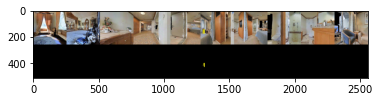

blue


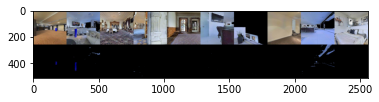

cyan


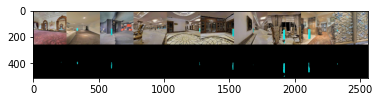

pink


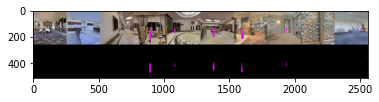

red


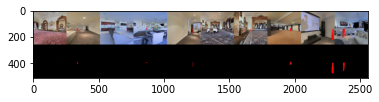

white


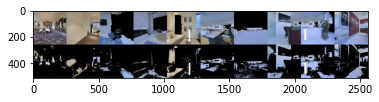

black


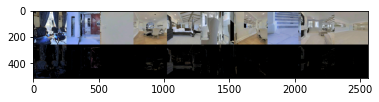

In [106]:
data_root = '../data/true_color'
num_samples = 10
hsv_metric_thres = 0.1

for color_name, color_value in colors.items():
    print(color_name)
    color_path = os.path.join(data_root, 'true_{}'.format(color_name))
    file_names = sorted(os.listdir(color_path))
    
    imgs = []
    file_cnt = 0
    for file_name in file_names:
        if file_name[-4:] != '.jpg':
            continue
        if file_cnt >= num_samples:
            break
        file_cnt += 1
        file_path = os.path.join(color_path, file_name)
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # use
        hsv_img = get_norm_hsv_img(
            cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        )
        hsv_color_value = get_norm_hsv_img(
            cv2.cvtColor(
                (255 * color_value).reshape(1, 1, 3).astype(np.uint8), 
                cv2.COLOR_RGB2HSV
            )
        )
        hsv_dist = np.sum((
            hsv2hsv_cone(hsv_img) 
            - hsv2hsv_cone(hsv_color_value)
        )**2, axis=2)
        
        hsv_dist_mask = hsv_dist < hsv_metric_thres
        hsv_dist_mask = hsv_dist_mask.reshape(hsv_dist.shape[0], hsv_dist.shape[1], 1)
        hsv_dist_mask = np.concatenate([hsv_dist_mask, ] * 3, axis=2) 
        hsv_dist_masked_img = img * hsv_dist_mask 
        img = np.concatenate([
            img, 
            # hsv_dist_mask * 255, 
            hsv_dist_masked_img
        ], axis=0)
        imgs.append(img)
        
    imgs = np.concatenate(imgs, axis=1)
    plt.imshow(imgs)
    plt.show()

    